# DALL・E

DALL・EをOpenAIのAPI経由で使うコードです．指示した文章を元に画像を生成します．3種類のサイズを生成でき，一度に1〜10枚の画像を生成できます．

In [23]:
import openai
import requests
from PIL import Image
from io import BytesIO
import IPython.display as display

### 画像を生成する

In [24]:
response = openai.Image.create(
  prompt="a white siamese cat",
  n=1, # 1〜10枚まで設定できる
  # 三つのサイズを選択できる
  #size = "256x256",
  #size = "512x512",
  size="1024x1024"
)

In [25]:
# 生成した画像のURLを取得
image_url = response['data'][0]['url']
response = requests.get(image_url)
response.raise_for_status()

### 画像の表示

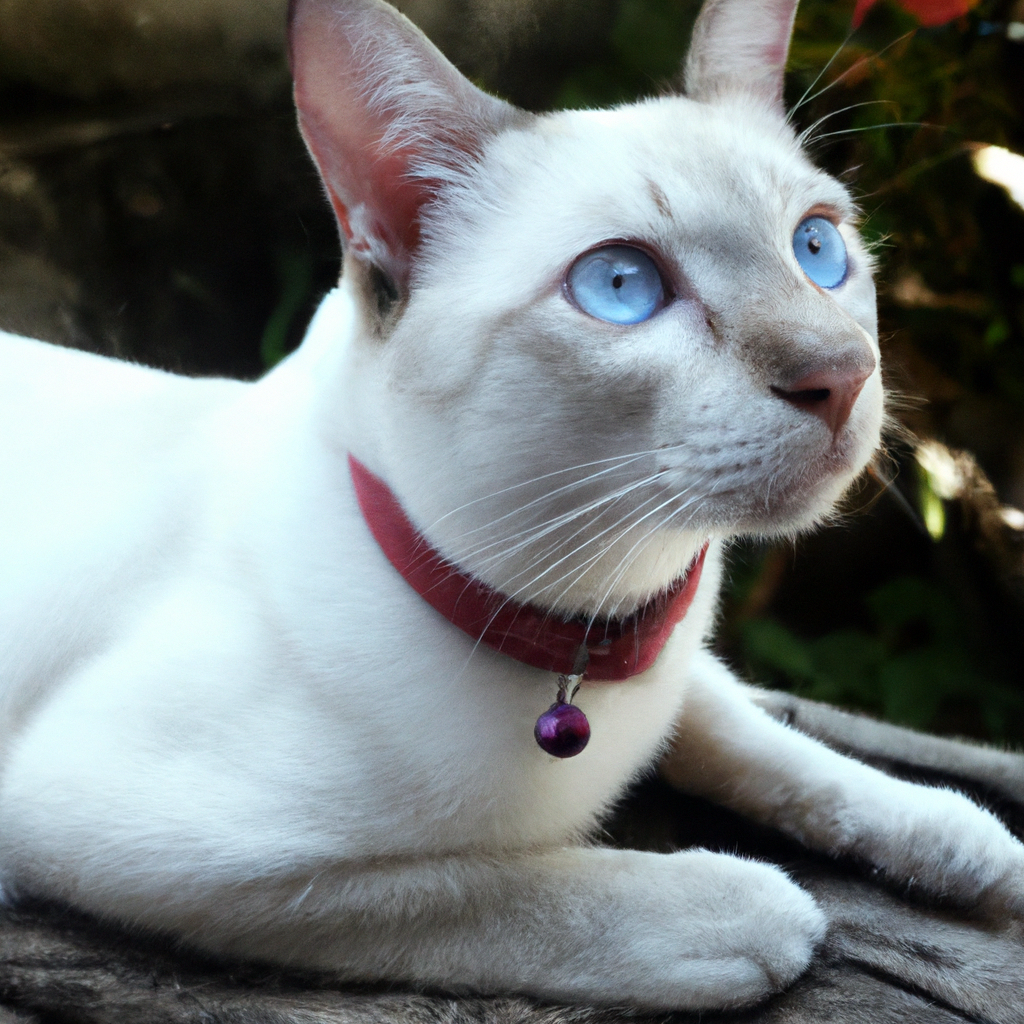

In [27]:
image_data = BytesIO(response.content)
image = Image.open(image_data)
display.display(image)

### 画像を保存する

In [28]:
with open('sample_image.png', 'wb') as file:
    file.write(response.content)